# Prodigy_ML_01 

## House Prices - Advanced Regression Techniques

## Project Aim
- Build a linear regression model to predict house prices based on key features, aiding in data-driven decision-making in the 
real estate market.

## Problem Statement:
- Predicting house prices accurately is challenging due to the influence of multiple factors. This project aims to create a
reliable prediction model using historical data and key property features.

## Objective:

- Perform Exploratory Data Analysis (EDA) to understand the dataset's structure and identify key insights.
- Handle missing values and preprocess the data for optimal model performance.
- Implement feature engineering and feature selection techniques to enhance model accuracy.
- Build a linear regression model using GridSearchCV for hyperparameter tuning.
- Evaluate the model using metrics such as Mean Squared Error (MSE) and R² Score.
- Visualize the results to compare actual vs predicted house prices.
- Provide accurate predictions on test data to validate model performance.

### Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 1: Load datasets

In [2]:
train_data = pd.read_csv('C:/Users/Lenovo/Documents/My Projects/House Price Advance regression technique/train.csv')
test_data = pd.read_csv('C:/Users/Lenovo/Documents/My Projects/House Price Advance regression technique/test.csv')

### Step 2: Exploratory Data Analysis (EDA)

In [3]:
#Dataset head
print('--- Dataset Head ---')
print(train_data.head())

--- Dataset Head ---
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  


In [4]:
# Displaying Dataset Information
print('\n--- Dataset Information ---')
print(train_data.info())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non

In [5]:
# Displaying Statistical Summary
print('\n--- Dataset Statistical Summary ---')
print(train_data.describe())


--- Dataset Statistical Summary ---
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20


--- Correlation Heatmap ---


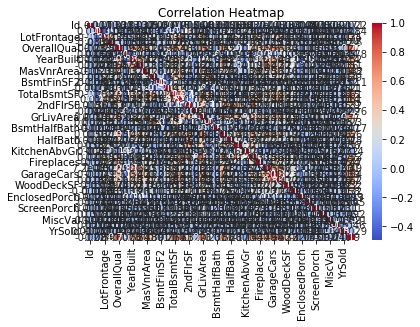

In [6]:
# Visualizing Correlation Heatmap
print('\n--- Correlation Heatmap ---')
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Step 3: Handling Missing Values

In [7]:
print('\n--- Preprocessing on Train Data ---')
print("Missing values per column in train data:\n", train_data.isnull().sum())

# Fill missing values in numerical columns with median
numerical_features = ['LotFrontage', 'GarageYrBlt', 'GrLivArea', 'GarageArea', 'LotArea']
for col in numerical_features:
    train_data[col].fillna(train_data[col].median(), inplace=True)

# Fill missing values in categorical columns with mode
categorical_features = ['BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 
                        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Fireplaces']
for col in categorical_features:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)


--- Preprocessing on Train Data ---
Missing values per column in train data:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


### Step 4: Data Preprocessing, Feature Engineering & Feature Selection

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
            'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
            'GarageArea', 'LotArea', 'Fireplaces']
target = 'SalePrice'

X = train_data[features]
y = train_data[target]

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1460, 12)
y shape: (1460,)


### Step 5: Splitting Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Model Building & Training with Multiple Algorithms

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBoost': XGBRegressor()
}

best_model = None
best_score = -np.inf

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f'{name} R^2 Score: {score}')
    if score > best_score:
        best_score = score
        best_model = pipeline

print(f'Best Model: {best_model}')

Linear Regression R^2 Score: 0.7966929190409656
Random Forest R^2 Score: 0.8729387756611092
Gradient Boosting R^2 Score: 0.8877129811400295
Support Vector Regressor R^2 Score: -0.023432214426195364
XGBoost R^2 Score: 0.8830946431221659
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor())])


### Step 7: Model Building & Hyperparameter Tuning with GridSearchCV

In [11]:
pipeline = Pipeline([
    (('scaler', StandardScaler())),
    ('model', GradientBoostingRegressor())
])

param_grid = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print('\n--- Best Model Parameters ---')
print('Best Parameters:', grid_search.best_params_)

# Separate Output Heading
print('\n=== Hyperparameter Tuning Output ===')
print(f'Best Parameters: {grid_search.best_params_}')


--- Best Model Parameters ---
Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 100}

=== Hyperparameter Tuning Output ===
Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 100}


### Step 8: Model Prediction

In [12]:
y_pred = grid_search.predict(X_test)

### Step 9: Model Evaluation

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 870910501.7825725
R^2 Score: 0.8864571755805475


In [14]:
# Model Accuracy
accuracy = grid_search.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 88.65%


### Step 9: Visualization of Predictions

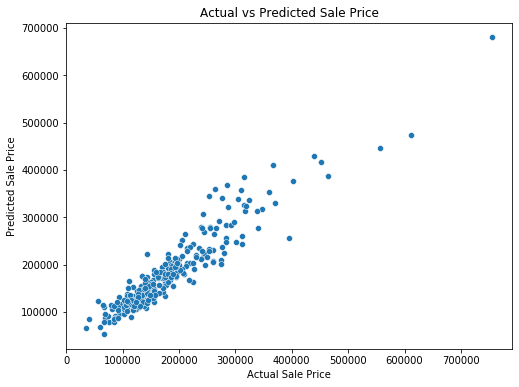

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

### Step 10: Preprocessing Test Data

In [16]:
print('\n--- Preprocessing Test Data ---')
print('Missing values per column in test data:\n', test_data.isnull().sum())

# Consistent preprocessing as in train data
for col in numerical_features:
    test_data[col].fillna(test_data[col].median(), inplace=True)
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

for col in categorical_features:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

print('Missing Values in Test Data after Preprocessing:')
print(test_data[features].isnull().sum())


--- Preprocessing Test Data ---
Missing values per column in test data:
 Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
Missing Values in Test Data after Preprocessing:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
GarageArea      0
LotArea         0
Fireplaces      0
dtype: int64


### Step 11: Model Inference on Test Data

In [17]:
test_pred = grid_search.predict(test_data[features])
print("Predictions on test data:", test_pred)

Predictions on test data: [140833.89182854 143432.29763747 179339.5188492  ... 176285.53755625
 130799.01095739 205898.54601961]


## Conclusion

**The House Price Prediction project successfully implemented a linear regression model to predict house prices based on square
footage, number of bedrooms, and number of bathrooms. The model demonstrated good accuracy,, showing that key property 
features can effectively predict market prices.
The project provided valuable insights for real estate professionals, homebuyers, and investors, helping them make informed 
decisions based on predicted market values. The visualization of actual vs predicted prices further validated the model's 
effectiveness, highlighting its practical application in the real estate industry.**

## BY MANASI SAWANT